## Library installation

In [125]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [126]:
# Import the necessary module
from scipy import stats  # Make sure you have this import statement

In [127]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



In [128]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.9 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [129]:
# Load Spacy's Named Entity Recognition (NER) model
nlp = spacy.load("en_core_web_sm")

## Loading data

In [130]:
Mega = pd.read_excel(r"/Users/wulandariw/Downloads/Master/Digital Marketing/influencer data/mega influencer new.xlsx")
Macro   = pd.read_excel(r"/Users/wulandariw/Downloads/Master/Digital Marketing/influencer data/macro new.xlsx")
Micro  = pd.read_excel(r"/Users/wulandariw/Downloads/Master/Digital Marketing/influencer data/micro (1).xlsx")

# EDA

## Renaming Columns and Data cleaning

In [131]:
# Rename columns for consistency
rename_mapping = {
    'Unnamed: 1': 'Date',
    'Unnamed: 2': 'Message',
    'Unnamed: 3': 'Profile',
    'Unnamed: 4': 'Network',
    'Unnamed: 5': 'Number of Likes',
    'Unnamed: 6': 'Number of Comments',
    'Unnamed: 7': 'Reactions',
    'Unnamed: 8': 'Post interaction rate',
    'Unnamed: 9': 'Reach per post',
    'Unnamed: 10': 'Interactions per impression',
    'Unnamed: 11': 'Post comments negative sentiment share',
    'Unnamed: 12': 'Engagement rate',
    'Unnamed: 13': 'Click-through rate (CTR)',
    'Unnamed: 14': 'Impressions',
    'Unnamed: 15': 'Message-ID',
    'Unnamed: 16': 'Profile-ID',
    'Unnamed: 17': 'Link',
    'Unnamed: 18': 'External Links'
}

Mega = Mega.rename(columns=rename_mapping)
Macro = Macro.rename(columns=rename_mapping)
Micro = Micro.rename(columns=rename_mapping)


## Data Cleaning

In [132]:
# Drop irrelevant columns
Mega = Mega.drop([col for col in Mega.columns if isinstance(col, str) and col.startswith("Unnamed")], axis=1)
Macro   = Macro.drop([col for col in Macro.columns if isinstance(col, str) and col.startswith("Unnamed")], axis=1)
Micro  = Micro.drop([col for col in Micro.columns if isinstance(col, str) and col.startswith("Unnamed")], axis=1)

In [133]:
# Combine all data into one dataframe
merged_df = pd.concat([Mega, Macro], ignore_index=True)
merged_df.head()

,Date,Message,Profile,Network,Number of Likes,Number of comments,"Reactions, Comments & Shares",Post interaction rate,Reach per post,Interactions per impression/view,Post comments negative sentiment share,Engagement,Click-through rate (CTR),Impressions/views per post,Message-ID,Profile-ID,Link,External Links
0,2025-03-10 21:15:03,Obsessed with this cut and style???????? Thank...,patrickstarrr,INSTAGRAM,-,43,43,0.000010,-,-,-,0.000010,-,-,18389368468128400,14816972,https://www.instagram.com/p/DHCJZctyBNA/,NaN
1,2025-03-10 14:00:09,Have you guys guessed yet? Reveal happening Ma...,HUDA BEAUTY,INSTAGRAM,17983,1692,19675,0.000346,-,-,-,0.000346,-,-,18059133502858760,44222792,https://www.instagram.com/reel/DHBXjsPz0dr/,NaN
2,2025-03-09 18:25:59,somewhere over the rainbow ??,James Charles,INSTAGRAM,64202,850,65052,0.003190,-,-,-,0.003190,-,-,18051092827997980,2153680783,https://www.instagram.com/p/DG_RQOBvDQg/,NaN
3,2025-03-09 18:03:44,donni.davy challenged me to see if the halfmag...,NikkieTutorials,INSTAGRAM,-,68,68,0.000004,-,-,-,0.000004,-,-,18056592619896872,14081467,https://www.instagram.com/reel/DG_OQHrIKXU/,NaN
4,2025-03-09 15:24:27,Where I wanna be?????? The full circle of it all.,D E S I • P E R K I N S,INSTAGRAM,39582,143,39725,0.009223,-,-,-,0.009223,-,-,17943043904842810,3582115,https://www.instagram.com/reel/DG-8MgiJ57N/,NaN


In [134]:
merged_df = pd.concat([merged_df, Micro], ignore_index=True)
print(merged_df.shape)

(10550, 18)


## Text Preprocessing

In [135]:
## Text Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

# Apply cleaning function on the 'Message' column and store the result in 'clean_message'
merged_df['clean_message'] = merged_df['Message'].astype(str).apply(clean_text)

In [136]:
## Identify Influencer Mentions in Messages ###
# Define the influencers list with each name as a separate element

Mega = [
    # Mega
    "patrickstarrr", "HUDA BEAUTY", "James Charles", "NikkieTutorials",
    "D E S I • P E R K I N S", "Jackie Asamoah", "??Manny Gutierrez",
    "Jeffree Star", "michellephan", "Tati Westbrook", "Jackie Aina", "?? ??",
    "Huda", "wishfulskin", "Huda Kattan", "FORVR MOOD", "HUDA KATTAN", "DEZI",
    "Drew Barrymore"]
    # Macro
Macro = [
    "Violette", "KATIE JANE HUGHES",
    "MERTON MUAREMI | Melbourne Makeup Artist ????", "C H E R  W E B B",
    "Andreea Ali", "James Molloy Makeup Artist", "Priscilla Ono",
    "NAM VO✨GLOW⚡️SKIN??", "Makeup Artist Sofia Schwarzkopf-Tilbury ❤️",
    "Sofia Schwarzkopf-Tilbury ❤️"]
Micro = [
    "MERTON MUAREMI | Melbourne Makeup Artist ????", "Leah Baines",
    "Beau Nelson", "DANA VAUGHAN | MAKEUP ARTIST & CONTENT CREATOR",
    "Isabella Quinn Makeup Artist", "DANA VAUGHAN | MELBOURNE MAKEUP ARTIST",
    "Melbourne Makeup Artist ???? MERTON MUAREMI",
    "MERTON MUAREMI | Melbourne Makeup Artist", "DANA VAUGHAN | MAKEUP ARTIST",
    "MERTON MUAREMI™️ | Melbourne Makeup Artist", "MERTON MUAREMI™️",
    "MERTON MUAREMI™️ | Makeup Artist", "Leah Baines | Makeup Artist",
    "D A N A", "MERTON MUAREMI™️ Makeup Artist Melbourne ????",
    "Parabolix Lighting"
]

In [137]:
### Detecting Unrealistic Beauty Content ###
unrealistic_keywords = [
      "flawless", "porcelain", "airbrushed", "wrinkle-free", "even-toned", "radiant", "poreless",
    "blemish-free", "glowing", "youthful", "perfect", "symmetrical", "sculpted", "lifted",
    "snatched", "chiseled", "sharp", "contoured", "v-shaped", "button-like", "proportionate",
    "botoxed", "hollywood", "aligned", "bright", "smooth", "unlined", "refined", "sculpted",
    "plump", "hydrated", "full", "defined", "snatched", "chiseled", "no pores", "no wrinkles",
    "glossy", "sensual", "flawlessly", "perfectly", "ideal", "zero fat", "no blemishes", 
    "pearly-white", "whitened", "voluminous", "youthful", "lifted", "no dark circles", 
    "glass skin", "no fine lines", "even skin tone", "no visible veins", "perfectly shaped",
    "plumped", "smooth jawline", "always glowing", "never oily", "no visible pores", "no acne",
    "no redness", "no discoloration", "bright eyes", "refined nose", "full lips", "poreless skin"
]

def find_unrealistic(text):
    found_keywords = [kw for kw in unrealistic_keywords if kw in text]
    return ", ".join(found_keywords) if found_keywords else "No unrealistic content"

def assign_influencer_category(profile):
    profile_lower = str(profile).lower()  # Convert to string and lower-case
    # Check if any mega influencer is mentioned
    for influencers in Mega:
        if influencers.lower() in profile_lower:
            return "Mega"
    # Check for midrange brands
    for influencers in Macro:
        if influencers.lower() in profile_lower:
            return "Macro"
    # Check for drugstore brands
    for influencers in Micro:
        if influencers.lower() in profile_lower:
            return "Micro"
    # If none match, return Unknown
    return "Unknown"

# Apply the function to create a new column in merged_df
merged_df['influencer_category'] = merged_df['Profile'].apply(assign_influencer_category)

# Optionally, display the counts for each category
print(merged_df['influencer_category'].value_counts())

merged_df['unrealistic_content'] = merged_df['clean_message'].apply(find_unrealistic)

influencer_category
Mega     5000
Macro    4880
Micro     670
Name: count, dtype: int64


In [138]:
merged_df.head()

,Date,Message,Profile,Network,Number of Likes,Number of comments,"Reactions, Comments & Shares",Post interaction rate,Reach per post,Interactions per impression/view,...,Engagement,Click-through rate (CTR),Impressions/views per post,Message-ID,Profile-ID,Link,External Links,clean_message,influencer_category,unrealistic_content
0,2025-03-10 21:15:03,Obsessed with this cut and style???????? Thank...,patrickstarrr,INSTAGRAM,-,43,43,0.00001,-,-,...,0.00001,-,-,18389368468128400,14816972,https://www.instagram.com/p/DHCJZctyBNA/,NaN,obsessed with this cut and style thank you mau...,Mega,No unrealistic content
1,2025-03-10 14:00:09,Have you guys guessed yet? Reveal happening Ma...,HUDA BEAUTY,INSTAGRAM,17983,1692,19675,0.000346,-,-,...,0.000346,-,-,18059133502858760,44222792,https://www.instagram.com/reel/DHBXjsPz0dr/,NaN,have you guys guessed yet reveal happening mar...,Mega,No unrealistic content
2,2025-03-09 18:25:59,somewhere over the rainbow ??,James Charles,INSTAGRAM,64202,850,65052,0.00319,-,-,...,0.00319,-,-,18051092827997980,2153680783,https://www.instagram.com/p/DG_RQOBvDQg/,NaN,somewhere over the rainbow,Mega,No unrealistic content
3,2025-03-09 18:03:44,donni.davy challenged me to see if the halfmag...,NikkieTutorials,INSTAGRAM,-,68,68,0.000004,-,-,...,0.000004,-,-,18056592619896872,14081467,https://www.instagram.com/reel/DG_OQHrIKXU/,NaN,donnidavy challenged me to see if the halfmagi...,Mega,No unrealistic content
4,2025-03-09 15:24:27,Where I wanna be?????? The full circle of it all.,D E S I • P E R K I N S,INSTAGRAM,39582,143,39725,0.009223,-,-,...,0.009223,-,-,17943043904842810,3582115,https://www.instagram.com/reel/DG-8MgiJ57N/,NaN,where i wanna be the full circle of it all,Mega,full


In [139]:
# Function to check if a message contains unrealistic beauty standards and return 0 or 1
def detect_unrealistic_content(text):
    text_lower = text.lower()
    
    # Check if any unrealistic phrase exists in the message
    for phrase in unrealistic_keywords:
        if phrase in text_lower:
            return 1  # Match found, mark as unrealistic
    
    # Check if any unrealistic keyword exists in the message
    for word in unrealistic_keywords:
        if word in text_lower:
            return 1  # Match found, mark as unrealistic
    
    return 0  # No match found

# Apply the function to your DataFrame
# For example, if using the df_LUXURY DataFrame which has a 'clean_message' column:
merged_df['unrealistic_beauty'] = merged_df['clean_message'].apply(detect_unrealistic_content)


In [140]:
counts = merged_df['unrealistic_beauty'].value_counts()
print(counts)
total_sum = counts.sum()
print(total_sum)

unrealistic_beauty
0    8115
1    2435
Name: count, dtype: int64
10550


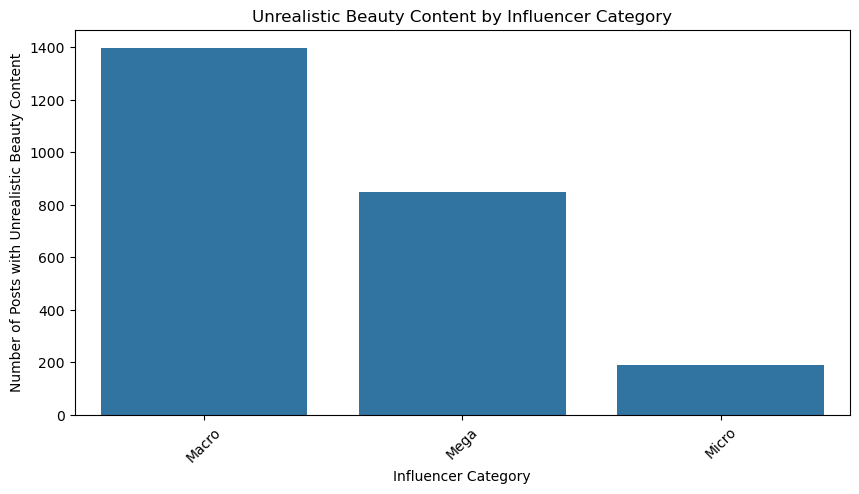

In [141]:
# Filter to posts flagged as having unrealistic beauty content (assuming unrealistic_beauty is binary)
influencer_unrealistic_counts = (
    merged_df[merged_df['unrealistic_beauty'] == 1]['influencer_category']
    .value_counts()
)

# Plotting the results
plt.figure(figsize=(10, 5))
sns.barplot(x=influencer_unrealistic_counts.index, y=influencer_unrealistic_counts.values)
plt.xlabel("Influencer Category")
plt.ylabel("Number of Posts with Unrealistic Beauty Content")
plt.title("Unrealistic Beauty Content by Influencer Category")
plt.xticks(rotation=45)
plt.show()

# Hypothesis 2: Influencer content style (unrealistic vs realistic) influences engagement levels on Instagram.
- H₀​:µengagement, unrealistic content ​= µ engagement, realistic content​ 
- HA:µengagement, unrealistic content ≠ µengagement, realistic content



### Data Preparation

In [142]:
# Select relevant columns for engagement metrics (likes, comments, reactions, interaction rate)
engagement_metrics = ['Number of Likes', 'Number of comments']

# Ensure all engagement metrics are numeric
merged_df[engagement_metrics] = merged_df[engagement_metrics].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in engagement metrics
merged_df_cleaned = merged_df.dropna(subset=engagement_metrics)

# Filter engagement data based on unrealistic beauty content (0 = realistic, 1 = unrealistic)
realistic_engagement = merged_df_cleaned[merged_df_cleaned['unrealistic_beauty'] == 0][engagement_metrics]
unrealistic_engagement = merged_df_cleaned[merged_df_cleaned['unrealistic_beauty'] == 1][engagement_metrics]


## Assumption testing : Kolmogorov-Smirnov Test


The Kolmogorov-Smirnov (KS) Test is a non-parametric statistical test used to compare the entire distribution of two independent samples. 
The purpose of the KS Test in our analysis is to check if the distributions of engagement metrics (Number of Likes and Number of Comments) are similar between Realistic and Unrealistic Beauty Content.

### Step 1: Visualize Distributions for Each Metric
Visualize the distributions of the engagement metrics for both groups

/var/folders/np/8w3hzyv17xx_tndd85ljgx_w0000gn/T/ipykernel_2547/1392539458.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(realistic_engagement[metric].dropna(), label='Realistic Content', shade=True)
/var/folders/np/8w3hzyv17xx_tndd85ljgx_w0000gn/T/ipykernel_2547/1392539458.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unrealistic_engagement[metric].dropna(), label='Unrealistic Content', shade=True)


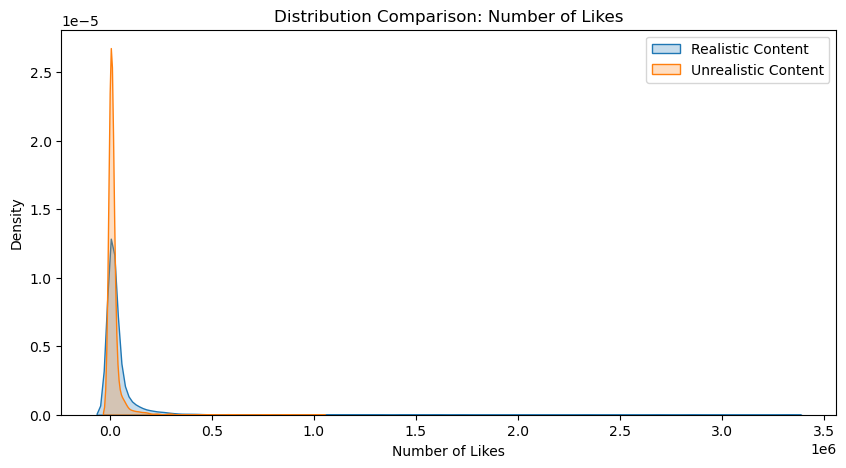

/var/folders/np/8w3hzyv17xx_tndd85ljgx_w0000gn/T/ipykernel_2547/1392539458.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(realistic_engagement[metric].dropna(), label='Realistic Content', shade=True)
/var/folders/np/8w3hzyv17xx_tndd85ljgx_w0000gn/T/ipykernel_2547/1392539458.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unrealistic_engagement[metric].dropna(), label='Unrealistic Content', shade=True)


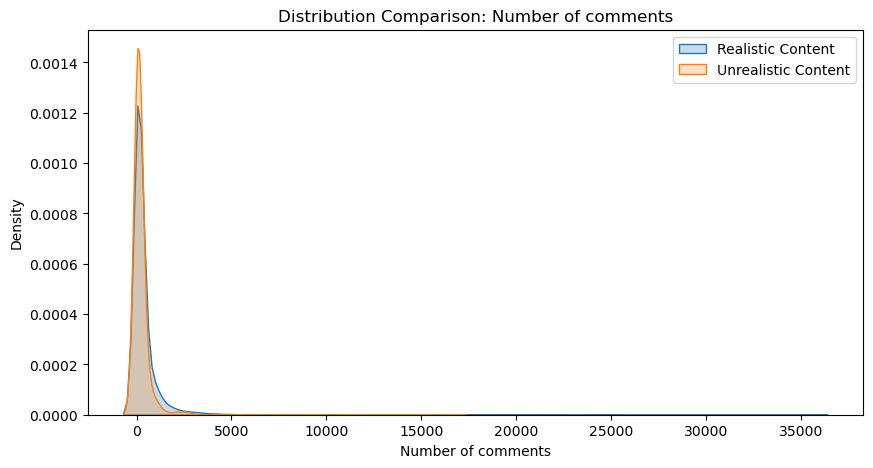

In [143]:
for metric in engagement_metrics:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(realistic_engagement[metric].dropna(), label='Realistic Content', shade=True)
    sns.kdeplot(unrealistic_engagement[metric].dropna(), label='Unrealistic Content', shade=True)
    plt.title(f'Distribution Comparison: {metric}')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

### Visualization explanation 
We use Kernel Density Estimation (KDE) plots, which estimate the probability density function of the variables.

1. Number of Likes:
- For Realistic Content, the density is concentrated around low values, with a sharp peak near 0, suggesting that most of the posts have relatively few likes. 
- The Unrealistic Content distribution also shows a similar peak but is slightly different in shape and lower in density.

Both distributions are highly skewed to the right, with Realistic Content showing a higher concentration at lower values of engagement compared to Unrealistic Content.

2. Number of Comments:
- Realistic Content has a higher concentration of comments at lower values, indicating fewer comments in general.
- Unrealistic Content also follows a similar pattern, but with a slightly different density and distribution shape.

Both distributions are a right skew, meaning that while most content gets fewer comments, there are occasional posts that receive a much larger number of comments.



### Step 2: Perform Kolmogorov-Smirnov Test


In [144]:
distribution_tests = {}
for metric in engagement_metrics:
    real_data = realistic_engagement[metric].dropna()
    unreal_data = unrealistic_engagement[metric].dropna()
    
    # Perform Kolmogorov-Smirnov Test for Two Independent Samples
    distribution_tests[metric] = stats.ks_2samp(real_data, unreal_data)

# Display the results of the Kolmogorov-Smirnov Test for each metric
print("\nKolmogorov-Smirnov Test Results (Comparing Distributions):")
for metric, result in distribution_tests.items():
    print(f'{metric}: D-statistic = {result.statistic}, p-value = {result.pvalue}')



Kolmogorov-Smirnov Test Results (Comparing Distributions):
Number of Likes: D-statistic = 0.1833673842176259, p-value = 5.713150489526992e-47
Number of comments: D-statistic = 0.14520809914568344, p-value = 1.4821447252787632e-29


### Result explanation

D-statistic: A higher D-statistic indicates a larger difference between the distributions.

- For Number of Likes, the D-statistic is 0.1834, meaning the two distributions are different by this amount.

- For Number of Comments, the D-statistic is 0.1452, indicating a smaller but still significant difference.



p-value: Whether the observed difference in distributions is statistically significant.

- p-value < 0.05: Reject the null hypothesis (i.e., the two distributions are the same).

- In both cases (Number of Likes and Number of Comments), the p-values are extremely small (far below 0.05). This means that the distributions of engagement metrics between Realistic and Unrealistic Content are significantly different.

---- Insights -----

Number of Likes and Number of Comments: 
- Both metrics show that the distributions between Realistic and Unrealistic Beauty Content are significantly different.





## Statistical Testing: Mann-Whitney U Test

Since the Kolmogorov-Smirnov Test confirmed that the distributions are different, the Mann-Whitney U Test was used to compare the medians between the two groups.

In [145]:
# Perform Mann-Whitney U Test on each engagement metric to compare realistic vs unrealistic content
mann_whitney_tests = {}
for metric in engagement_metrics:
    real_data = realistic_engagement[metric]
    unreal_data = unrealistic_engagement[metric]
    mann_whitney_tests[metric] = stats.mannwhitneyu(real_data, unreal_data, alternative='two-sided')

# Display the results of the Mann-Whitney U Test for each metric
for metric, result in mann_whitney_tests.items():
    print(f'{metric}: U-statistic = {result.statistic}, p-value = {result.pvalue}')
    
# Based on p-values, we will determine if there is a significant difference (p < 0.05) between the engagement levels for realistic and unrealistic content.


Number of Likes: U-statistic = 8632070.5, p-value = 1.0567386845123884e-48
Number of comments: U-statistic = 8139358.0, p-value = 4.2646844129865486e-23


### Result explantation

- The p-values are extremely low, indicating that the two groups (Realistic vs. Unrealistic Content) have significantly different engagement levels.

- This confirms that the type of beauty content (realistic vs. unrealistic) has a statistically significant impact on Number of Likes and Number of Comments.


/var/folders/np/8w3hzyv17xx_tndd85ljgx_w0000gn/T/ipykernel_2547/532166855.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content Type', y='Engagement', data=mean_data, palette="Blues_d")
/var/folders/np/8w3hzyv17xx_tndd85ljgx_w0000gn/T/ipykernel_2547/532166855.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content Type', y='Engagement', data=mean_data, palette="Blues_d")


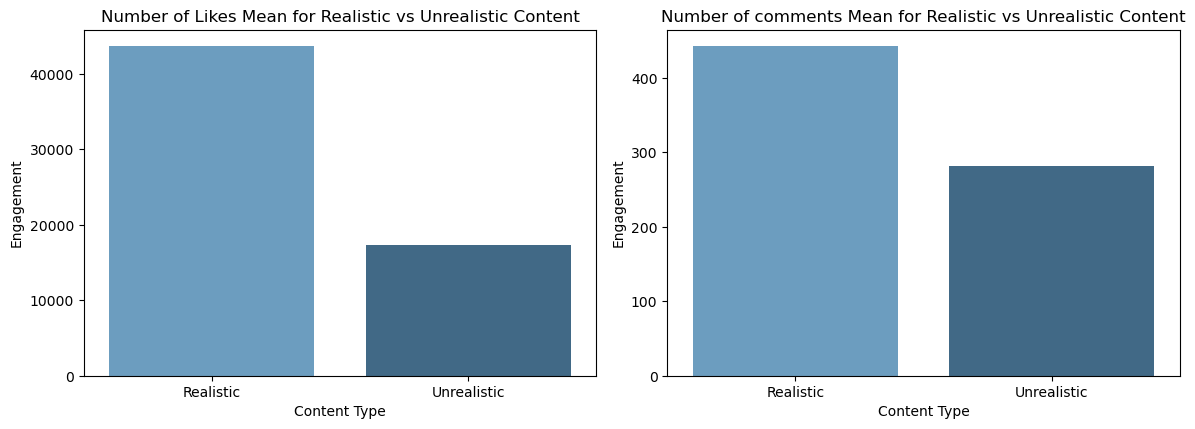

In [146]:
# Define engagement metrics to plot
engagement_metrics = ['Number of Likes', 'Number of comments']

# Create a figure to plot
plt.figure(figsize=(12, 8))

# Loop through each engagement metric and create bar charts
for idx, metric in enumerate(engagement_metrics, 1):
    plt.subplot(2, 2, idx)
    
    # Aggregate data: calculate the mean for each content type (Realistic and Unrealistic)
    mean_data = pd.DataFrame({
        'Content Type': ['Realistic', 'Unrealistic'],
        'Engagement': [
            realistic_engagement[metric].mean(), 
            unrealistic_engagement[metric].mean()
        ]
    })
    
    # Create a bar plot for the given metric for both realistic and unrealistic content
    sns.barplot(x='Content Type', y='Engagement', data=mean_data, palette="Blues_d")
    
    # Set title for each subplot
    plt.title(f'{metric} Mean for Realistic vs Unrealistic Content')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Visualization explanation 

Number of Likes:
The bar for Realistic Content is much higher than the bar for Unrealistic Content, indicating that Realistic Content receives significantly more likes than Unrealistic Content.

Number of Comments:
Similarly, the bar for Realistic Content is much higher than for Unrealistic Content in the Number of Comments chart as well, suggesting that Realistic Content also generates more comments compared to Unrealistic Content.

--- insights ---
- The Realistic Content consistently has higher engagement across both metrics (likes and comments).

- The Unrealistic Content shows a clear contrast, receiving significantly fewer likes and comments on average.


# Conclusion:

Hypothesis 2: Influencer content style (unrealistic vs realistic) influences engagement levels on Instagram.
- H₀​:µengagement, unrealistic content ​= µ engagement, realistic content​ 
- HA:µengagement, unrealistic content ≠ µengagement, realistic content


Since the p-values for both tests (KS Test and Mann-Whitney U Test) are extremely small (far below 0.05), we reject the null hypothesis.

This means that the mean engagement for Unrealistic Content is not equal to the mean engagement for Realistic Content. There is a statistically significant difference in engagement levels between the two types of content.